In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [91]:
df = pd.read_csv("Hitters.csv")
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


0.23548421536378605


C:\conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\conda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16833735.842967812, tolerance: 5508.956607582999
  positive)


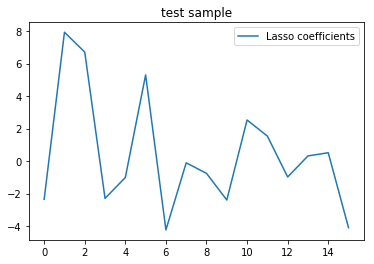

In [100]:
# name = df['Unnamed: 0']
xs = df.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague', 'Salary'], axis = 1)
xs_test = xs.tail(50)
xs = xs[:272]
xs.fillna(method = 'pad')
y = df['Salary']
y_test = y.tail(50)
y_test = y_test.fillna(method = 'bfill')
y = y[:272]
y = y.fillna(method = 'bfill')
y.values.reshape(-1, 1)

lassocv = LassoCV()
lassocv.fit(xs, y)
alpha = lassocv.alpha_

lasso = Lasso(alpha=1)
y_lasso = lasso.fit(xs, y).predict(xs_test)
r2_score_lasso = r2_score(y_test, y_lasso)
print(r2_score_lasso)

plt.plot(lasso.coef_, label='Lasso coefficients')
plt.legend(loc='best')
plt.title('test sample')
plt.show()